In [441]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./data/Pasien_Data_all.csv')
df.head()

,NIK/BPJS,NAMA,JK,Umur,TTL,No.HP,Jaminan Kes (BPJS/Mandiri),Alamat,Poli,Alergi,...,Tekanan Darah (mmHg),Nadi (x/menit),Berat Badan(Kg),Tinggi Badan(cm),BMI (Body Mass Index),Panjang Lahir(cm),Berat Lahir(Kg),Diagnosis,Stunting,Treatment
0,640194945577,Nurlaila Lessy,P,6,"Tokyo, 9 Mei 2017",83012112306,Mandiri,Jl. Damai,Poli Anak,NaN,...,110/90,83,53.0,155,22.1,NaN,NaN,"myalgia, Hiperkolestrol, supra cts",Tidak,Tidak Ada Treatment
1,784426371042,Agus,L,15,"Ciledug, 9 Oktober 2007",8123478327,BPJS,Jl. Sukadamai,Poli Anak,NaN,...,105/80,79,60.0,169,21.0,NaN,NaN,Demam,Tidak,Paracetamol\nibuprofen
2,868159375240,Zain,L,12,"Masohi, 21 Maret 2011",82239327571,BPJS,Jl. Perdamaian,Poli Umum,-,...,113/85,94,56.0,178,17.7,NaN,NaN,Demam,Ya,Paracetamol\nibuprofen
3,641915658142,Fadil,L,2,"Jakarta, 9 Mei 2021",81224529871,BPJS,Jl. Pasar Minggu,Poli Anak,NaN,...,100/70,93,13.0,85,18.0,50.3,2.5,Demam,Ya,Paracetamol\nibuprofen
4,871452764450,Raihan,L,20,"Rio de Janeiro, 3 September 2002",8123434353,BPJS,Jl. Raya Setiabudhi,Poli Umum,NaN,...,110/90,107,55.1,150,24.5,NaN,NaN,Asma,Tidak,-budesonide\n-fluticasone\n-beclomethasone


In [442]:
df.columns

Index(['NIK/BPJS', 'NAMA', 'JK', 'Umur', 'TTL', 'No.HP',
       'Jaminan Kes (BPJS/Mandiri)', 'Alamat', 'Poli', 'Alergi', 'Nama wali',
       'Keluhan Utama', 'Suhu(C`)', 'Tekanan Darah (mmHg)', 'Nadi (x/menit)',
       'Berat Badan(Kg)', 'Tinggi Badan(cm)', 'BMI (Body Mass Index)',
       'Panjang Lahir(cm)', 'Berat Lahir(Kg)', 'Diagnosis', 'Stunting',
       'Treatment'],
      dtype='object')

In [548]:
dt = df[['Umur','Keluhan Utama', 'Suhu(C`)', 'Tekanan Darah (mmHg)', 'Nadi (x/menit)',
       'Berat Badan(Kg)', 'Tinggi Badan(cm)', 'Diagnosis']]

dt.rename(columns={
    'Umur':'umur',
    'Keluhan Utama':'keluhan_utama',
    'Suhu(C`)':'suhu', 
    'Tekanan Darah (mmHg)':'tkd', 
    'Nadi (x/menit)':'nadi',
    'Berat Badan(Kg)':'bb', 
    'Tinggi Badan(cm)':'tb'
}, inplace=True)
dt.head()

,umur,keluhan_utama,suhu,tkd,nadi,bb,tb,Diagnosis
0,6,"Tangan keram, badan nyeri, mual, muntah",36.7,110/90,83,53.0,155,"myalgia, Hiperkolestrol, supra cts"
1,15,panas tinggi,38.5,105/80,79,60.0,169,Demam
2,12,panas tinggi,37.1,113/85,94,56.0,178,Demam
3,2,panas tinggi,38.2,100/70,93,13.0,85,Demam
4,20,"sesak nafas, batuk, batuk berdahak, lemas",35.8,110/90,107,55.1,150,Asma


In [549]:
dt[['tkd_1', 'tkd_2']] = dt['tkd'].str.split('/', expand=True).astype('int32')
dt.drop('tkd', axis=1, inplace=True)
dt.head()

,umur,keluhan_utama,suhu,nadi,bb,tb,Diagnosis,tkd_1,tkd_2
0,6,"Tangan keram, badan nyeri, mual, muntah",36.7,83,53.0,155,"myalgia, Hiperkolestrol, supra cts",110,90
1,15,panas tinggi,38.5,79,60.0,169,Demam,105,80
2,12,panas tinggi,37.1,94,56.0,178,Demam,113,85
3,2,panas tinggi,38.2,93,13.0,85,Demam,100,70
4,20,"sesak nafas, batuk, batuk berdahak, lemas",35.8,107,55.1,150,Asma,110,90


In [550]:
dt = dt.append(dt[['umur', 'suhu', 'nadi', 'bb', 'tb', 'tkd_1', 'tkd_2']]+1)
dt = dt.append(dt[['umur', 'suhu', 'nadi', 'bb', 'tb', 'tkd_1', 'tkd_2']]+2)
dt = dt.reset_index()
dt.drop('index', axis=1, inplace=True)

In [551]:
dt.head()

,umur,keluhan_utama,suhu,nadi,bb,tb,Diagnosis,tkd_1,tkd_2
0,6,"Tangan keram, badan nyeri, mual, muntah",36.7,83,53.0,155,"myalgia, Hiperkolestrol, supra cts",110,90
1,15,panas tinggi,38.5,79,60.0,169,Demam,105,80
2,12,panas tinggi,37.1,94,56.0,178,Demam,113,85
3,2,panas tinggi,38.2,93,13.0,85,Demam,100,70
4,20,"sesak nafas, batuk, batuk berdahak, lemas",35.8,107,55.1,150,Asma,110,90


In [552]:
dt['Diagnosis'].value_counts()

Demam                                 9
Campak                                6
Diare                                 6
Radang Tenggorokan                    5
Asma                                  4
Cacar                                 4
Radang Perut (Muntaber)               4
Flu                                   3
Cacingan                              3
Pneumonia                             2
DBD                                   2
myalgia, Hiperkolestrol, supra cts    1
Name: Diagnosis, dtype: int64

In [553]:
np.random.choice(dt.Diagnosis.value_counts().index)

'Pneumonia'

In [554]:
def na_randomfill(series):
    na_mask = pd.isnull(series)   # boolean mask for null values
    n_null = na_mask.sum()        # number of nulls in the Series
    
    if n_null == 0:
        return series             # if there are no nulls, no need to resample
    
    # Randomly sample the non-null values from our series
    #  only sample this Series as many times as we have nulls 
    fill_values = series[~na_mask].sample(n=n_null, replace=True, random_state=0)

    # This ensures our new values will replace NaNs in the correct locations
    fill_values.index = series.index[na_mask]
    
    return series.fillna(fill_values) 

In [559]:
dt['Diagnosis'] = na_randomfill(dt['Diagnosis'])
dt['keluhan_utama'] = na_randomfill(dt['keluhan_utama'])

In [ ]:
fill = np.where(dt['Diagnosis'] == 'unknown', np.random.choice(dt['Diagnosis'].value_counts().index), dt['Diagnosis'])
fill

In [560]:
dt['Diagnosis'].value_counts()

Demam                                 35
Campak                                28
Diare                                 22
Radang Perut (Muntaber)               20
Cacar                                 18
Asma                                  14
Flu                                   14
myalgia, Hiperkolestrol, supra cts    10
Radang Tenggorokan                    10
Pneumonia                              9
Cacingan                               9
DBD                                    7
Name: Diagnosis, dtype: int64

In [561]:
encoder = LabelEncoder()
encoder.fit(dt[['keluhan_utama']])
dt['keluhan_utama'] = encoder.transform(dt['keluhan_utama'])
dt.head()

,umur,keluhan_utama,suhu,nadi,bb,tb,Diagnosis,tkd_1,tkd_2
0,6,0,36.7,83,53.0,155,"myalgia, Hiperkolestrol, supra cts",110,90
1,15,6,38.5,79,60.0,169,Demam,105,80
2,12,6,37.1,94,56.0,178,Demam,113,85
3,2,6,38.2,93,13.0,85,Demam,100,70
4,20,9,35.8,107,55.1,150,Asma,110,90


In [562]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           196 non-null    int64  
 1   keluhan_utama  196 non-null    int32  
 2   suhu           196 non-null    float64
 3   nadi           196 non-null    int64  
 4   bb             196 non-null    float64
 5   tb             196 non-null    int64  
 6   Diagnosis      196 non-null    object 
 7   tkd_1          196 non-null    int32  
 8   tkd_2          196 non-null    int32  
dtypes: float64(2), int32(3), int64(3), object(1)
memory usage: 11.6+ KB


In [563]:
label = pd.get_dummies(dt['Diagnosis'], columns=['Diagnosis'])
dt.drop('Diagnosis', axis=1, inplace=True)
label.head()

,Asma,Cacar,Cacingan,Campak,DBD,Demam,Diare,Flu,Pneumonia,Radang Perut (Muntaber),Radang Tenggorokan,"myalgia, Hiperkolestrol, supra cts"
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [564]:
labels = np.array(label)

In [565]:
scaler = MinMaxScaler()
dt_scaler = scaler.fit_transform(dt)
dt_scaler[3]

array([0.04166667, 0.54545455, 0.47761194, 0.52380952, 0.07894737,
       0.13392857, 0.27777778, 0.25641026])

In [566]:
X_train, X_test, y_train, y_test = train_test_split(dt_scaler, labels, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [567]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(124, 8)
(40, 8)
(32, 8)


In [568]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=uint8)

In [569]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(124, 12)
(40, 12)
(32, 12)


In [570]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential, optimizers, losses, regularizers

In [571]:
X_train.shape[-1]

8

In [584]:
model = Sequential([
    layers.Dense(128, input_shape=(X_train.shape[-1],), activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.01),
    layers.Dense(24, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.01),
    layers.Dense(12, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

log = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    verbose=1,
    batch_size=2
)

Epoch 1/100
62/62 [==============================] - 1s 3ms/step - loss: 2.7568 - accuracy: 0.0565 - val_loss: 2.7126 - val_accuracy: 0.0625
Epoch 2/100
62/62 [==============================] - 0s 1ms/step - loss: 2.6066 - accuracy: 0.1613 - val_loss: 2.6459 - val_accuracy: 0.0625
Epoch 3/100
62/62 [==============================] - 0s 1ms/step - loss: 2.5054 - accuracy: 0.1613 - val_loss: 2.5970 - val_accuracy: 0.0625
Epoch 4/100
62/62 [==============================] - 0s 1ms/step - loss: 2.4281 - accuracy: 0.1694 - val_loss: 2.5301 - val_accuracy: 0.0625
Epoch 5/100
62/62 [==============================] - 0s 1ms/step - loss: 2.3463 - accuracy: 0.1694 - val_loss: 2.4004 - val_accuracy: 0.1562
Epoch 6/100
62/62 [==============================] - 0s 1ms/step - loss: 2.2448 - accuracy: 0.1935 - val_loss: 2.2927 - val_accuracy: 0.2500
Epoch 7/100
62/62 [==============================] - 0s 1ms/step - loss: 2.1335 - accuracy: 0.2581 - val_loss: 2.1839 - val_accuracy: 0.3125
Epoch 8/100
6

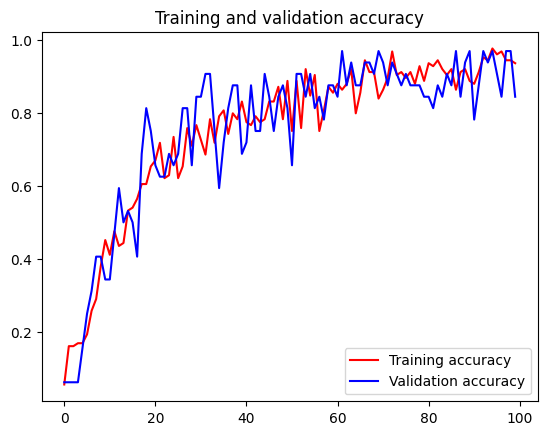

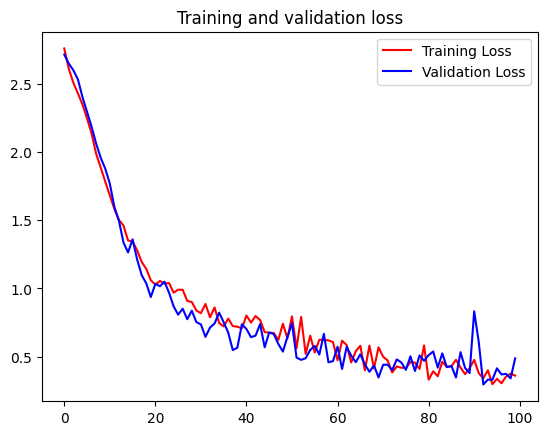

In [585]:
acc = log.history['accuracy']
val_acc = log.history['val_accuracy']
loss = log.history['loss']
val_loss = log.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()